# Bike Share System
## Jack Farmer HOMEWORK, 6 November 2023

*Modeling and Simulation in Python*

Copyright 2021 Allen Downey

License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)

In [19]:
# import functions from modsim
from modsim import *

In [20]:
def step(state, p1, p2, p3, p4, p5 ,p6):
    """Simulate one time step.
    
    state: bikeshare State object
    p1: probability of an Olin->Wellesley ride
    p2: probability of a Wellesley->Olin ride
    """
    if flip(p1): # A -> B
        bike_p1(state)
    
    if flip(p2): # B -> A
        bike_p2(state)
        
    if flip(p3): # A -> C
        bike_p3(state)
    
    if flip(p4): # C -> A
        bike_p4(state)
    
    if flip(p5): # B -> c
        bike_p5(state)
    
    if flip(p6): # C -> B
        bike_p6(state)
    
        
def bike_p1(state):
    """Move one bike from A to B.
    
    state: bikeshare State object
    """
    if state.A == 0:
        state.A_empty += 1
        return
    state.A -= 1
    state.B += 1
    
def bike_p2(state):
    """Move one bike from B to A.
    
    state: bikeshare State object
    """
    
    if state.B == 0:
        state.B_empty += 1
        return
    state.B -= 1
    state.A += 1
    
def bike_p3(state):
    """Move one bike from A to C.
    
    state: bikeshare State object
    """
    if state.A == 0:
        state.A_empty += 1
        return
    state.A -= 1
    state.C += 1

def bike_p4(state):
    """Move one bike from C to A.
    
    state: bikeshare State object
    """
    if state.C == 0:
        state.C_empty += 1
        return
    state.C -= 1
    state.A += 1
    
def bike_p5(state):
    """Move one bike from B to C.
    
    state: bikeshare State object
    """
    if state.B == 0:
        state.B_empty += 1
        return
    state.B -= 1
    state.C += 1
    
def bike_p6(state):
    """Move one bike from C to B.
    
    state: bikeshare State object
    """
    if state.C == 0:
        state.C_empty += 1
        return
    state.C -= 1
    state.B += 1

In [21]:
def run_simulation(state, p1, p2, p3, p4, p5, p6, num_steps, do_plot=True):
    """Simulate the given number of time steps.
    
    state: State object
    p1: probability of an Olin->Wellesley customer arrival
    p2: probability of a Wellesley->Olin customer arrival
    num_steps: number of time steps
    """
    results_A = TimeSeries()
    results_A[0] = state.A
    results_B = TimeSeries()
    results_B[0] = state.B
    results_C = TimeSeries()
    results_C[0] = state.C
    results_A_unsatisfied = TimeSeries()
    results_A_unsatisfied[0] = state.A_empty
    results_B_unsatisfied = TimeSeries()
    results_B_unsatisfied[0] = state.B_empty
    results_C_unsatisfied = TimeSeries()
    results_C_unsatisfied[0] = state.C_empty
    
    for i in range(num_steps):
        step(state, p1, p2, p3, p4, p5, p6)
        results_A[i+1] = state.A
        results_B[i+1] = state.B
        results_C[i+1] = state.C
        results_A_unsatisfied[i+1] = state.A_empty
        results_B_unsatisfied[i+1] = state.B_empty
        results_C_unsatisfied[i+1] = state.C_empty
        
    if (do_plot):
        fig, ax = plt.subplots(1,2,figsize=(12,6))
        ax[0].plot(results_A, label='A')
        ax[0].plot(results_B, label='B')
        ax[0].plot(results_C, label='C')
        ax[0].set_xlabel('Time step (min)')
        ax[0].set_ylabel('Number of bikes')
        ax[0].legend()
        ax[1].plot(results_A_unsatisfied, label='A')
        ax[1].plot(results_B_unsatisfied, label='B')
        ax[1].plot(results_C_unsatisfied, label='C')
        ax[1].set_xlabel('Time step (min)')
        ax[1].set_ylabel('Number of unsatisfied customers')
        ax[1].legend()
        plt.show()
    
    return results_A_unsatisfied[num_steps-1] + results_B_unsatisfied[num_steps-1] + results_C_unsatisfied[num_steps-1]

In [22]:
p_AB = 0.3
p_BA = 0.2
p_AC = 0.4
p_CA = 0.1
p_BC = 0.35
p_CB = 0.15

N_slots = 12

nstart_A = []
nstart_B = []
nstart_C = []
tu_avg = []

num_sims = 100

for N_start_A in range(N_slots+1):
    for N_start_B in range(N_slots + 1 - N_start_A):
        nstart_A.append(N_start_A)
        nstart_B.append(N_start_B)
        N_start_C = N_slots - N_start_A - N_start_B
        nstart_C.append(N_start_C)
    
        print(N_start_A, N_start_B, N_start_C)
    
        tu_sum = 0
        
        for j in range(num_sims):
            bikeshare = State(A=N_start_A, B=N_start_B, C=N_start_C,
                      A_empty=0, B_empty=0, C_empty=0)
            do_plot = False
            total_unsatisfied = run_simulation(bikeshare, p_AB, p_BA, p_AC, p_CA, p_BC, p_CB, 100, do_plot)
    
            #print("Total unsatisfied customers: ", j, total_unsatisfied)
            tu_sum += total_unsatisfied
        
        print("Average unsatisfied customers: ", tu_sum/(1.0*num_sims))
        tu_avg.append(tu_sum/(1.0*num_sims))
    


0 0 12
Average unsatisfied customers:  83.69
0 1 11
Average unsatisfied customers:  82.15
0 2 10
Average unsatisfied customers:  80.28
0 3 9
Average unsatisfied customers:  80.0
0 4 8
Average unsatisfied customers:  78.47
0 5 7
Average unsatisfied customers:  76.5
0 6 6
Average unsatisfied customers:  75.63
0 7 5
Average unsatisfied customers:  73.4
0 8 4
Average unsatisfied customers:  72.19
0 9 3
Average unsatisfied customers:  70.05
0 10 2
Average unsatisfied customers:  66.88
0 11 1
Average unsatisfied customers:  68.48
0 12 0
Average unsatisfied customers:  65.27
1 0 11
Average unsatisfied customers:  80.12
1 1 10
Average unsatisfied customers:  80.58
1 2 9
Average unsatisfied customers:  77.78
1 3 8
Average unsatisfied customers:  76.2
1 4 7
Average unsatisfied customers:  74.67
1 5 6
Average unsatisfied customers:  73.72
1 6 5
Average unsatisfied customers:  70.28
1 7 4
Average unsatisfied customers:  70.9
1 8 3
Average unsatisfied customers:  67.94
1 9 2
Average unsatisfied cus

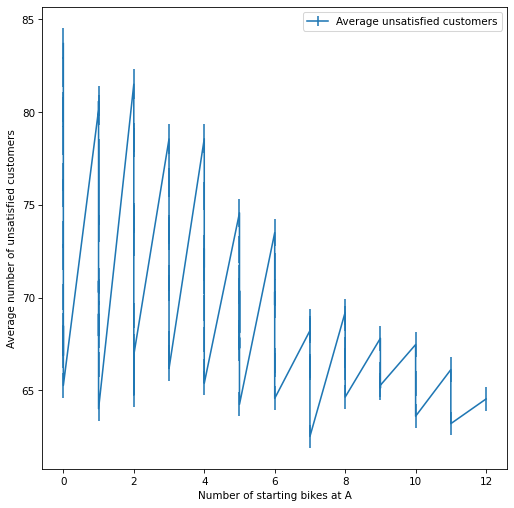

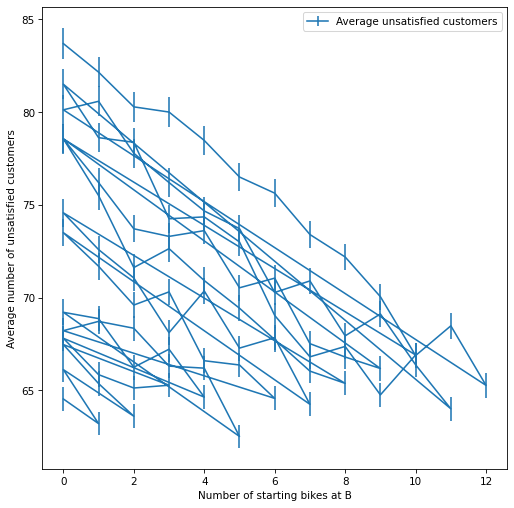

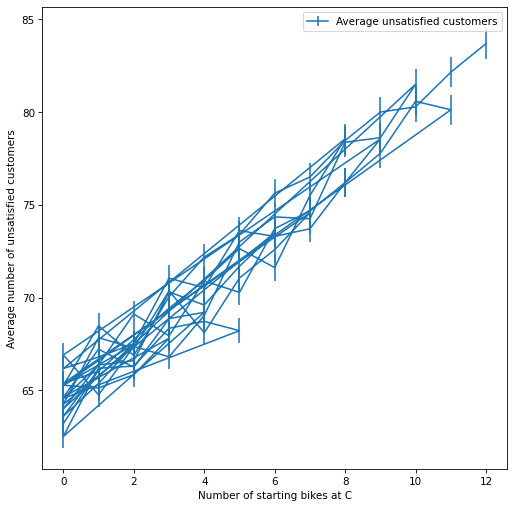

In [23]:
tu_avg_error = 0.01*np.array(tu_avg)

fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.errorbar(nstart_A, tu_avg, tu_avg_error, label='Average unsatisfied customers')
ax.set_xlabel('Number of starting bikes at A')
ax.set_ylabel('Average number of unsatisfied customers')
ax.legend()
fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.errorbar(nstart_B, tu_avg, tu_avg_error, label='Average unsatisfied customers')
ax.set_xlabel('Number of starting bikes at B')
ax.set_ylabel('Average number of unsatisfied customers')
ax.legend()
fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.errorbar(nstart_C, tu_avg, tu_avg_error, label='Average unsatisfied customers')
ax.set_xlabel('Number of starting bikes at C')
ax.set_ylabel('Average number of unsatisfied customers')
ax.legend()

## Modeling a Bike Share System

Imagine a bike share system for students traveling between Olin College and Wellesley College, which are about three miles apart in eastern Massachusetts.

Suppose the system contains 12 bikes and two bike racks, one at Olin and one at Wellesley, each with the capacity to hold 12 bikes.

As students arrive, check out a bike, and ride to the other campus, the number of bikes in each location changes. In the simulation, we'll need to keep track of where the bikes are. To do that, we'll use a function called `State`, which is defined in the ModSim library.

## Under the Hood

This section contains additional information about the functions we've used and pointers to their documentation.

You don't need to know anything in this section, so if you are already feeling overwhelmed, you might want to skip it.
But if you are curious, read on.

`State` and `TimeSeries` objects are based on the `Series` object defined by the Pandas library.
The documentation is at <https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html>.

`Series` objects provide their own `plot` function, which is why we call it like this:

```
results.plot()
```

Instead of like this:

```
plot(results)
```

You can read the documentation of `Series.plot` at <https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html>.

`decorate` is based on Matplotlib, which is a widely used plotting library for Python.  Matplotlib provides separate functions for `title`, `xlabel`, and `ylabel`.
`decorate` makes them a little easier to use.
For the list of keyword arguments you can pass to `decorate`, see <https://matplotlib.org/3.2.2/api/axes_api.html?highlight=axes#module-matplotlib.axes>.

The `flip` function uses NumPy's `random` function to generate a random number between 0 and 1, then returns `True` or `False` with the given probability.

You can get the source code for `flip` (or any other function) by running the following cell.

In [24]:
source_code(flip)

def flip(p=0.5):
    """Flips a coin with the given probability.

    p: float 0-1

    returns: boolean (True or False)
    """
    return np.random.random() < p
